<a href="https://colab.research.google.com/github/juan21javm/Reportes-de-An-lisis-de-Algoritmos-MCDI-INFOTEC-2025-1/blob/main/Foster_Generators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problema de transporte de Foster Generators**

**Grafo del Problema de transporte de Foster Generators**

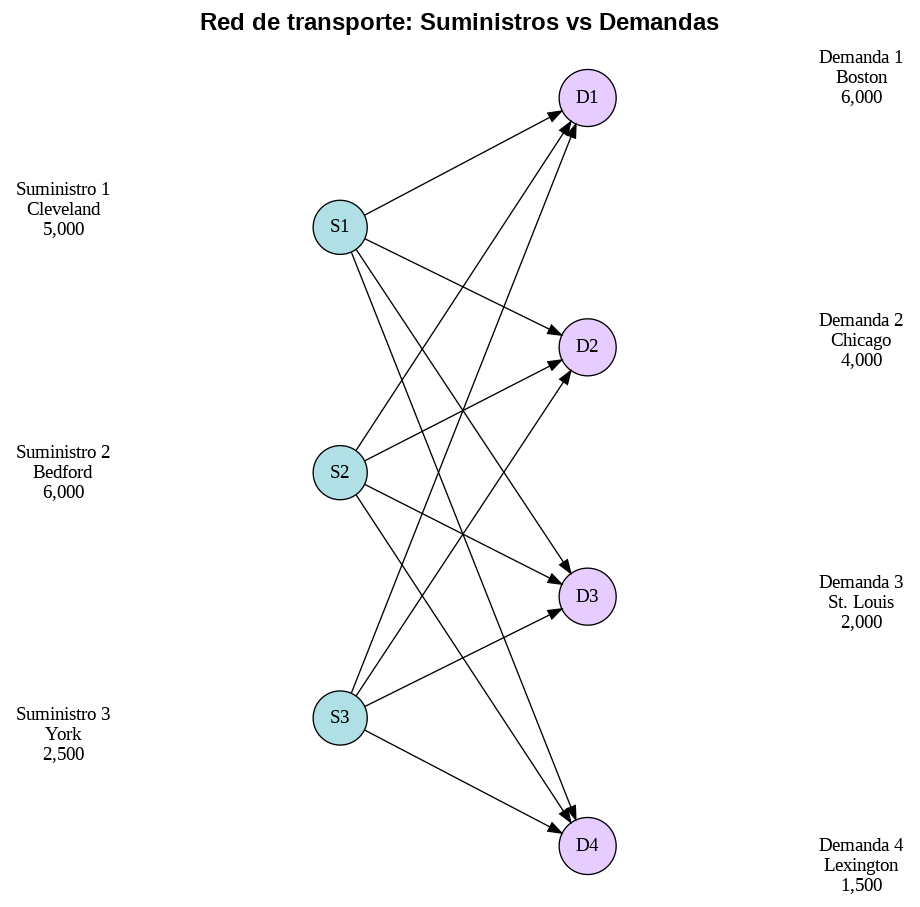

In [ ]:
from graphviz import Digraph
from IPython.display import Image

# Crear el grafo dirigido
dot = Digraph('FosterGraphSimple', format='png')

# Título
dot.attr(
    label="Red de transporte: Suministros vs Demandas",
    labelloc="t",
    labeljust="c",
    fontsize='18',
    fontname='Helvetica-Bold'
)

# Estilo general
dot.attr(rankdir='LR', nodesep='2', ranksep='2', splines='true')

# Nodos de suministro (izquierda)
dot.node('S1', 'S1', shape='circle', style='filled', fillcolor='#B0E0E6')  # Cleveland
dot.node('S2', 'S2', shape='circle', style='filled', fillcolor='#B0E0E6')  # Bedford
dot.node('S3', 'S3', shape='circle', style='filled', fillcolor='#B0E0E6')  # York

# Etiquetas de suministro (izquierda externa)
dot.node('L1', 'Suministro 1\nCleveland\n5,000', shape='plaintext')
dot.node('L2', 'Suministro 2\nBedford\n6,000', shape='plaintext')
dot.node('L3', 'Suministro 3\nYork\n2,500', shape='plaintext')
dot.edge('L1', 'S1', style='invis')
dot.edge('L2', 'S2', style='invis')
dot.edge('L3', 'S3', style='invis')

# Nodos de demanda (derecha)
dot.node('D1', 'D1', shape='circle', style='filled', fillcolor='#E6CCFF')  # Boston
dot.node('D2', 'D2', shape='circle', style='filled', fillcolor='#E6CCFF')  # Chicago
dot.node('D3', 'D3', shape='circle', style='filled', fillcolor='#E6CCFF')  # St. Louis
dot.node('D4', 'D4', shape='circle', style='filled', fillcolor='#E6CCFF')  # Lexington

# Etiquetas de demanda (derecha externa)
dot.node('R1', 'Demanda 1\nBoston\n6,000', shape='plaintext')
dot.node('R2', 'Demanda 2\nChicago\n4,000', shape='plaintext')
dot.node('R3', 'Demanda 3\nSt. Louis\n2,000', shape='plaintext')
dot.node('R4', 'Demanda 4\nLexington\n1,500', shape='plaintext')
dot.edge('D1', 'R1', style='invis')
dot.edge('D2', 'R2', style='invis')
dot.edge('D3', 'R3', style='invis')
dot.edge('D4', 'R4', style='invis')

# Crear todas las conexiones posibles entre cada suministro y cada demanda
for s in ['S1', 'S2', 'S3']:
    for d in ['D1', 'D2', 'D3', 'D4']:
        dot.edge(s, d)

# Renderizar y mostrar imagen
output_path = dot.render(filename='grafo_foster_colores', cleanup=True)
Image(output_path)


**Valores y costos reducidos**  

In [ ]:
# Solución del Problema de Transporte de Foster Generators

# Importar las librerías necesarias
from scipy.optimize import linprog
import numpy as np
import pandas as pd

# Definir los coeficientes de la función objetivo (costos de transporte por unidad)
# Orden de variables: x11, x12, x13, x14, x21, x22, x23, x24, x31, x32, x33, x34
c = [3, 2, 7, 6,
     7, 5, 2, 3,
     2, 5, 4, 5]  # Costos por unidad entre plantas y destinos

# Establecer las restricciones de oferta (capacidad máxima de cada planta)
A_ub = [
    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # Cleveland ≤ 5000
    [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],  # Bedford ≤ 6000
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]   # York ≤ 2500
]
b_ub = [5000, 6000, 2500]

# Establecer las restricciones de demanda (cantidad exacta requerida en cada destino)
A_eq = [
    [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],  # Boston = 6000
    [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],  # Chicago = 4000
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],  # St. Louis = 2000
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]   # Lexington = 1500
]
b_eq = [6000, 4000, 2000, 1500]

# Resolver el problema de transporte mediante el método símplex general ('highs')
res = linprog(c=c, A_ub=A_ub, b_ub=b_ub,
              A_eq=A_eq, b_eq=b_eq,
              method='highs')

# Construir la tabla de resultados con los valores asignados a cada variable xij
variables = ['x11', 'x12', 'x13', 'x14',
             'x21', 'x22', 'x23', 'x24',
             'x31', 'x32', 'x33', 'x34']

df_resultado = pd.DataFrame({
    'Variable': variables,
    'Valor asignado': res.x.round(2)
})

# Mostrar los resultados finales en formato tabla
print("Solución del Problema de Transporte de Foster Generators\n")
print(df_resultado.to_string(index=False))
print("\nValor mínimo de la función objetivo (costo total): $", round(res.fun, 2))



Solución del Problema de Transporte de Foster Generators

Variable  Valor asignado
     x11          3500.0
     x12          1500.0
     x13             0.0
     x14             0.0
     x21             0.0
     x22          2500.0
     x23          2000.0
     x24          1500.0
     x31          2500.0
     x32             0.0
     x33             0.0
     x34             0.0

Valor mínimo de la función objetivo (costo total): $ 39500.0
